# Analisando clientes de um banco
Queremos identificar os diferentes comportamentos dos clientes e agrupá-los para direcionarmos possíveis ações de negócio.
## Importando os dados

In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [2]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

## Agrupando as instâncias e validando a separação
Vamos usar o KMeans para agrupar as instâncias. A seguir, usaremos algumas métricas próprias de clustering para avaliar se nossos resultados estão satisfatórios.

In [6]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.to_numpy())
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [8]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.36454479258047573

In [9]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.076046490609319

In [10]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.790347716921

In [11]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [12]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [13]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36443927743081506 1.0758787031571042 3431.782548172111


In [14]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24413114382433204 1.2369066457412803 1612.9826933903387


#### Será que os resultados obtidos são bons? Vamos comparar esses valores com os obtidos de dados aleatórios.

In [15]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03916270628548108 3.59516529891147 302.2442645008651
0.36443927743081506 1.0758787031571042 3431.782548172111


#### O objetivo agora é avaliar a estabilidade dos nossos dados. Dividiremos ele em grupos e esperamos que as métricas sejam parecidas. Isso ajuda a validar os nossos dados.

In [16]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36871947128237154 1.0562346825020208 1204.1115110650273
0.35416642754504835 1.1382306445993162 1194.9519865048878
0.36685269244474583 1.0988027839846313 1167.5299723518194


## Visualizando os dados

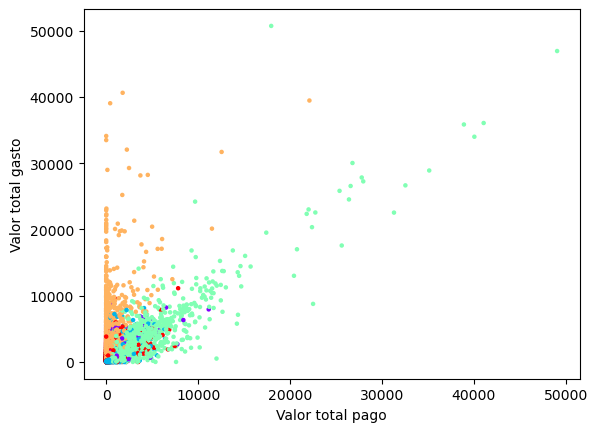

In [17]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

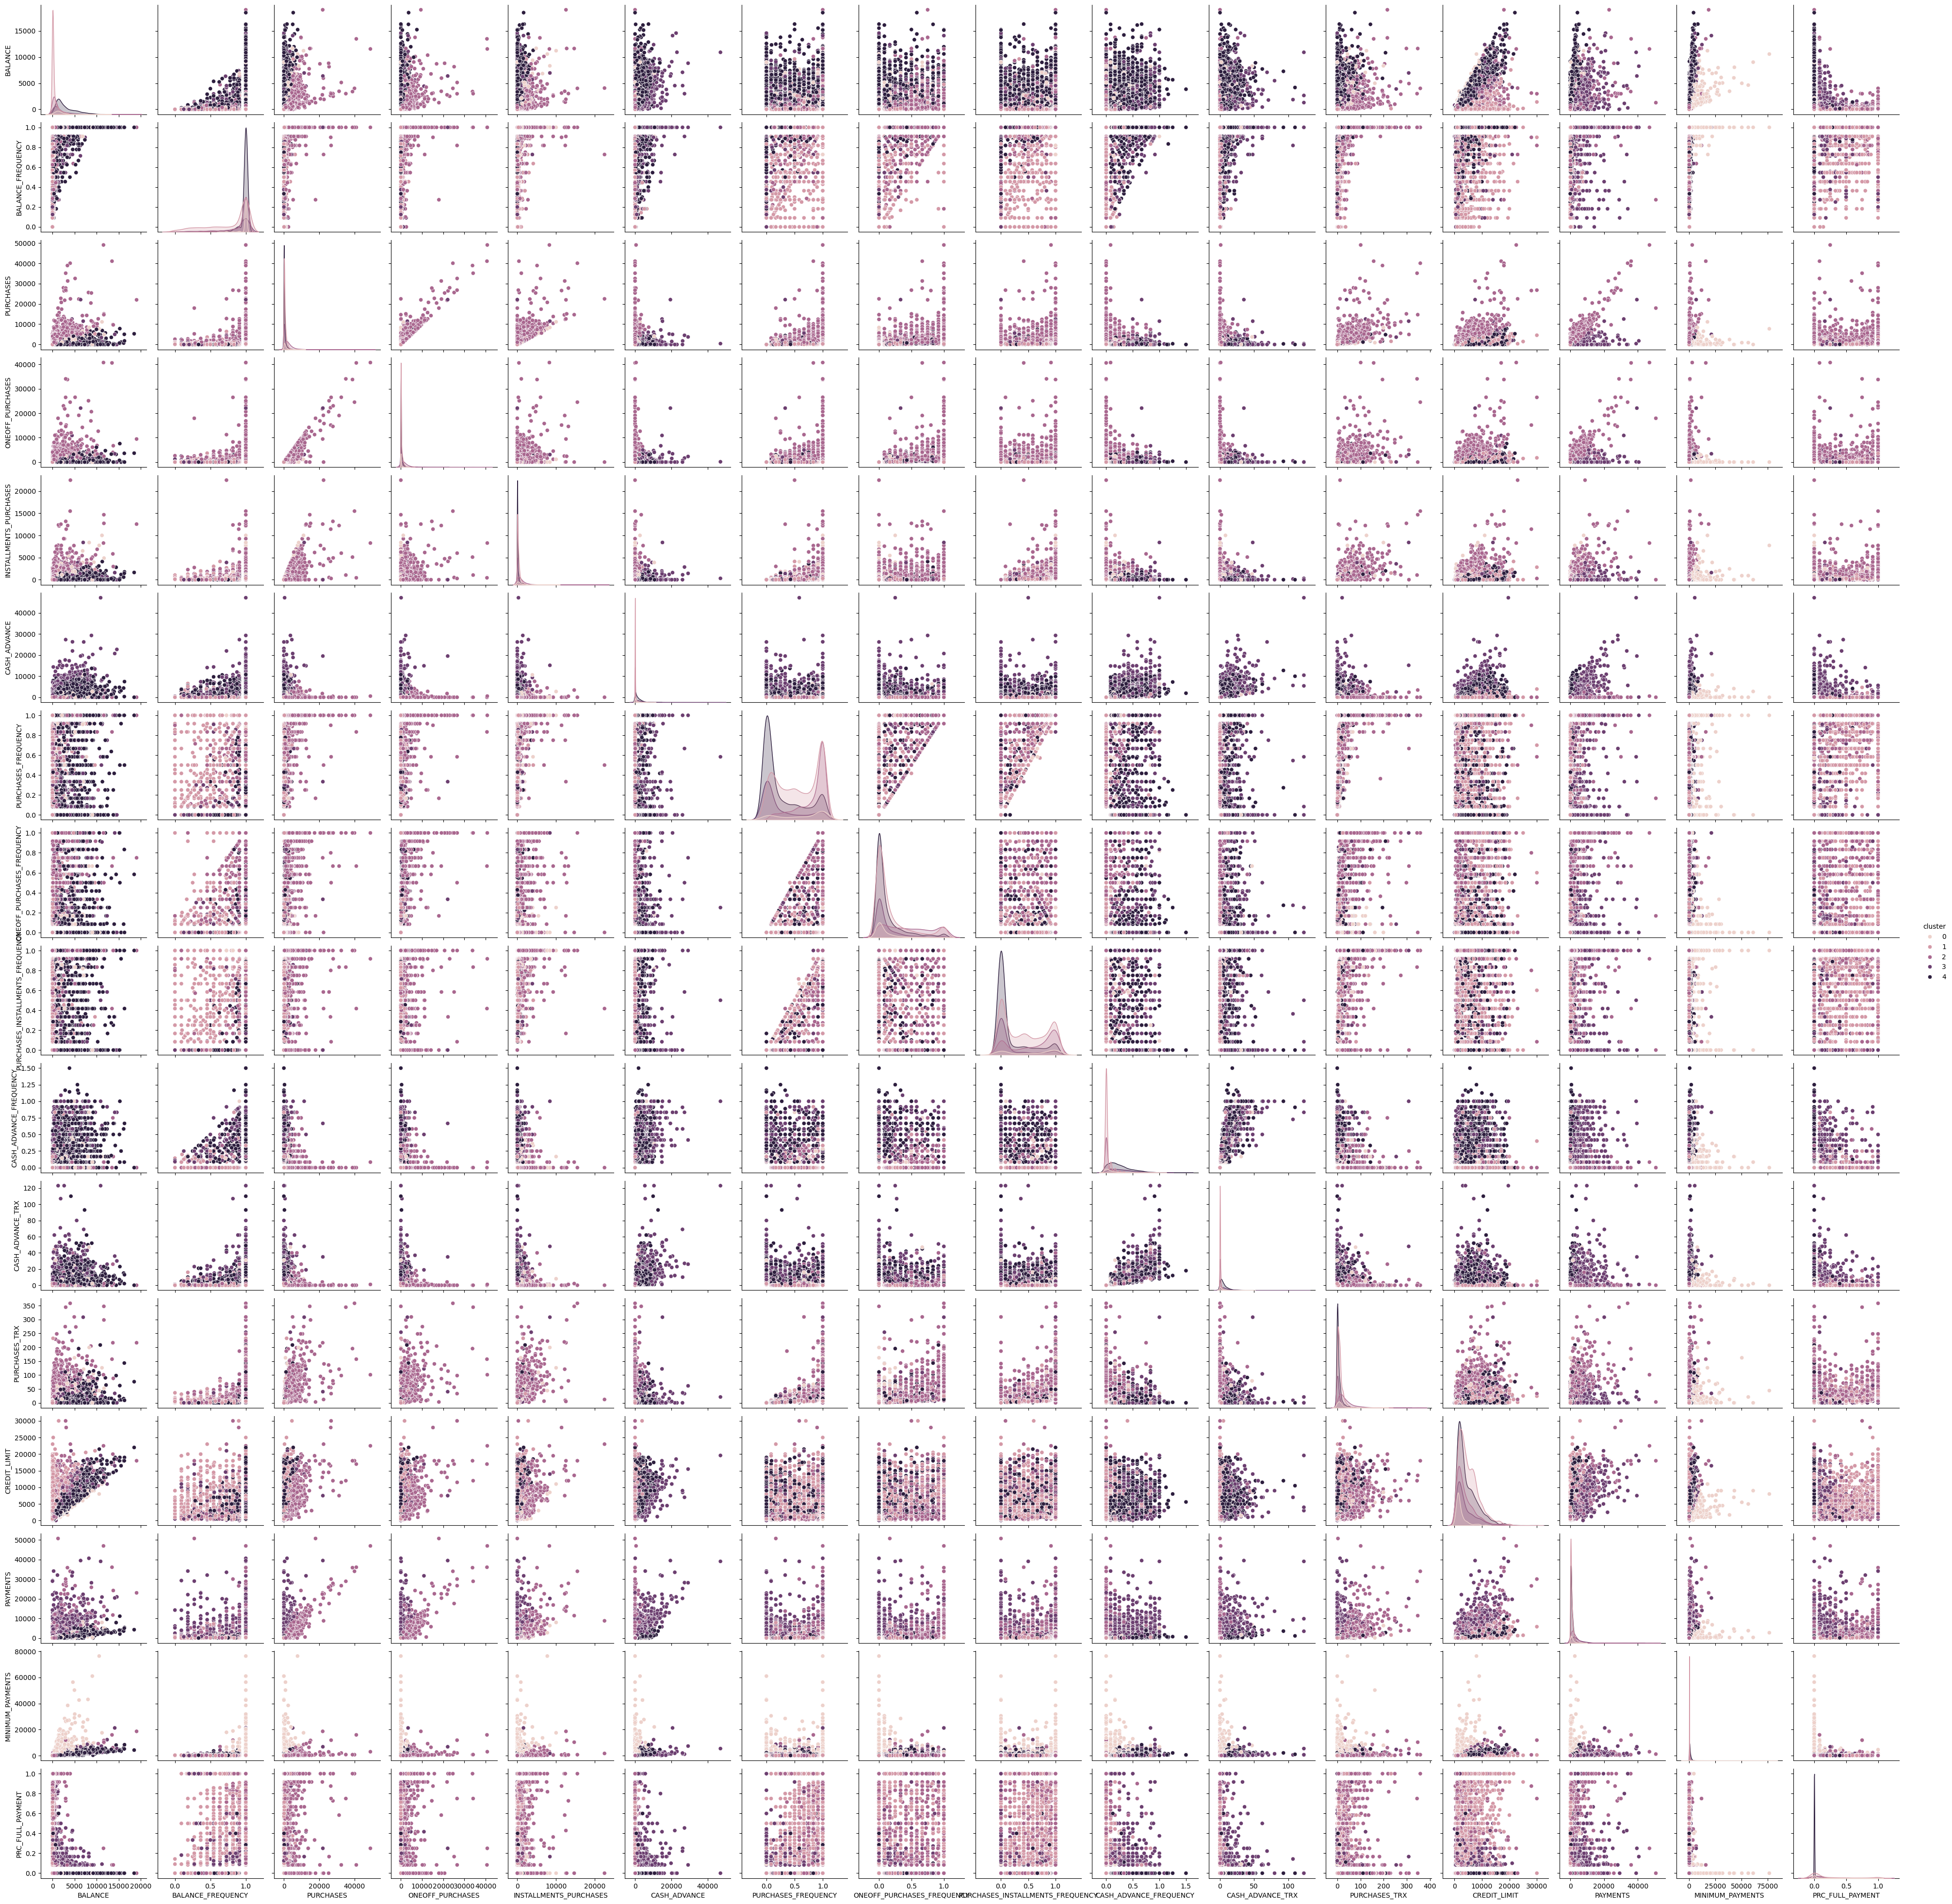

In [18]:
import seaborn as sns

dataframe["cluster"] = labels
sns.pairplot(dataframe, hue="cluster"')

Nem sempre a visualização ajuda a entender os dados, ao menos não de maneira evidente.
## Análise estatística
Buscaremos as categorias com maior relevância, mediremos isso com base na variância do dados.

In [20]:
centroids = kmeans.cluster_centers_
centroids

array([[3.33483624e-01, 2.68969713e-04, 1.59146477e-01, 3.61931219e-02,
        1.23336164e-01, 5.80731211e-02, 1.67333390e-04, 2.64804728e-05,
        1.47698430e-04, 1.92281888e-05, 4.25862512e-04, 3.87053484e-03,
        3.77114118e-01, 2.52735252e-01, 6.78741705e-01, 4.21940580e-06],
       [6.89799575e-02, 2.30763006e-04, 1.21587120e-01, 4.79794677e-02,
        7.37079733e-02, 2.40200669e-02, 1.73016299e-04, 3.36944404e-05,
        1.40456777e-04, 7.83464589e-06, 1.22859223e-04, 2.86637386e-03,
        9.43639117e-01, 1.53810130e-01, 5.68564456e-02, 7.61967577e-05],
       [1.60105064e-01, 2.45216495e-04, 4.38561405e-01, 2.57200631e-01,
        1.81532508e-01, 2.58728121e-02, 2.04312848e-04, 8.90625500e-05,
        1.50516286e-04, 9.39341912e-06, 1.69901859e-04, 6.17654349e-03,
        6.03940941e-01, 4.02431241e-01, 8.53054178e-02, 7.19457109e-05],
       [2.35130689e-01, 2.16418717e-04, 6.04525670e-02, 3.44569238e-02,
        2.60008529e-02, 3.99755165e-01, 5.26563547e-05, 2.052

In [21]:
max = len(centroids[0])
for i in range(max):
    print("{:35s}{:.4f}".format(dataframe.columns.values[i], centroids[:, i].var()))

BALANCE                            0.0224
BALANCE_FREQUENCY                  0.0000
PURCHASES                          0.0197
ONEOFF_PURCHASES                   0.0077
INSTALLMENTS_PURCHASES             0.0036
CASH_ADVANCE                       0.0225
PURCHASES_FREQUENCY                0.0000
ONEOFF_PURCHASES_FREQUENCY         0.0000
PURCHASES_INSTALLMENTS_FREQUENCY   0.0000
CASH_ADVANCE_FREQUENCY             0.0000
CASH_ADVANCE_TRX                   0.0000
PURCHASES_TRX                      0.0000
CREDIT_LIMIT                       0.0360
PAYMENTS                           0.0280
MINIMUM_PAYMENTS                   0.0541
PRC_FULL_PAYMENT                   0.0000


In [25]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", ""]]
n_clients = description.size()
description = description.mean().round(2)
description['n_clients'] = n_clients
description = description.sort_values('n_clients', ascending= False).reset_index(drop=True)
description.index.name = 'cluster'
description

BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  \
cluster                                                             
0         443.78     629.28        140.65       5130.89    814.34   
1        3036.95     385.30       1637.38       4495.58    968.78   
2        1141.87    3274.07        183.50       4098.80   3037.14   
3        1795.33     476.81       3267.20       3982.45   4713.38   
4        1987.15     858.33        420.11       2226.70   1338.97   

         PRC_FULL_PAYMENT  n_clients  
cluster                               
0                    0.25       3279  
1                    0.00       2650  
2                    0.28       1536  
3                    0.12       1073  
4                    0.02        412

In [24]:
dict = {"BALANCE": "saldo", "PURCHASES": "compras", "CASH_ADVANCE": "empréstimo_no_crédito",
        "CREDIT_LIMIT": "limite_de_credito", "PAYMENTS": "pagamentos"}
description.rename(columns=dict, inplace=True)
description

saldo  compras  empréstimo_no_crédito  limite_de_credito  \
cluster                                                               
0         443.78   629.28                 140.65            5130.89   
1        3036.95   385.30                1637.38            4495.58   
2        1141.87  3274.07                 183.50            4098.80   
3        1795.33   476.81                3267.20            3982.45   
4        1987.15   858.33                 420.11            2226.70   

         pagamentos  n_clients  
cluster                         
0            814.34       3279  
1            968.78       2650  
2           3037.14       1536  
3           4713.38       1073  
4           1338.97        412

##### Abaixo analisaremos o percetual de pagamento dos grupos:

In [26]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe().sort_values('count', ascending= False).reset_index(drop=True)

count      mean       std  min  25%       50%       75%  max
0  3279.0  0.246881  0.346775  0.0  0.0  0.000000  0.444444  1.0
1  2650.0  0.001798  0.023256  0.0  0.0  0.000000  0.000000  0.6
2  1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0
3  1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0
4   412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0

### Conclusões

CLUSTER 0: Maioria dos clientes. Saldo baixo. Não gastam muito mas pagam em dia. Maior limite.

CLUSTER 1: São os que tem o melhor saldo e alto limite. Compram pouco mas fazem bastantes empréstimos. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras, mas quase não fazem empréstimos. Têm um bom limite e são os melhores pagadores.

CLUSTER 3: Clientes que fazem muitos empréstimos, mas poucas compras. Têm bom saldo.

CLUSTER 4: Clientes com o menor limite, mas com o melhor saldo. Menor quantidade de clientes. Não são bons pagadores.